In [620]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [621]:
tv = pd.read_csv('tvmarketing.csv')

In [622]:
tv.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [623]:
tv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [624]:
tv.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


<AxesSubplot:xlabel='TV', ylabel='Sales'>

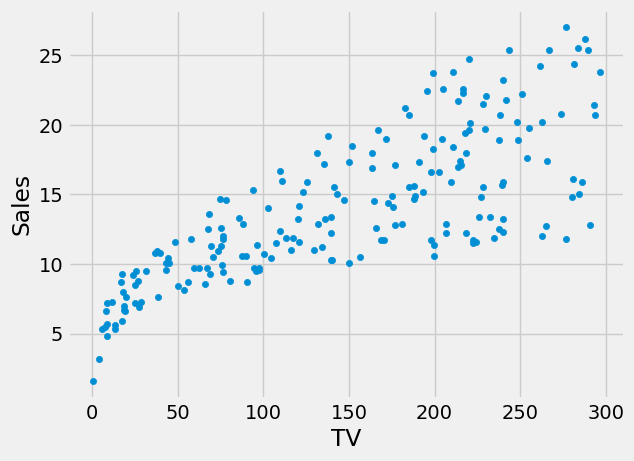

In [625]:
tv.plot(x='TV',y='Sales',kind='scatter')

In [626]:
x = tv['TV']
y = tv['Sales']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [627]:
def init_params():
    m = np.random.uniform(0,1)
    b = np.random.uniform(0,1)
    return m,b

In [628]:
m,b = init_params()

In [629]:
def gradients(x,y,y_pred,n):
    dm = (-2/n)*sum(x*(y-y_pred))
    db = (-2/n)*sum(y-y_pred)
    return db,dm

In [630]:
def update_params(m,b,dm,db,lr):
    m = m - lr*dm
    b = b - lr*db
    return m,b

In [631]:
import numpy as np

class GradientDescentLinearRegression:
    def __init__(self, learning_rate=0.000009, iterations=1000):
        self.learning_rate, self.iterations = learning_rate, iterations
    
    def fit(self, X, y):
        b = 0
        m = 5
        n = X.shape[0]
        for i in range(self.iterations):
            b_gradient = -2 * np.sum(y - m*X + b) / n
            m_gradient = -2 * np.sum(X*(y - (m*X + b))) / n
            b = b - (self.learning_rate * b_gradient)
            m = m - (self.learning_rate * m_gradient)
        self.m, self.b = m, b
        self.n = n
        
    def predict(self, X):
        return self.m*X + self.b

Text(0.5, 1.0, 'Gradient Descent Linear Regressor')

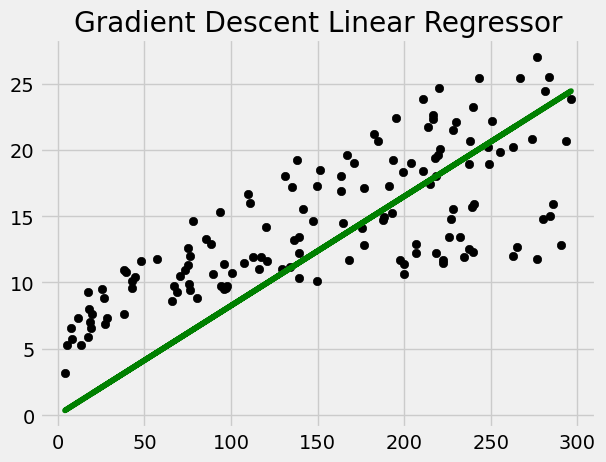

In [632]:
clf = GradientDescentLinearRegression()
clf.fit(X_train, Y_train)
Y_pred_train = clf.predict(X_train)

import matplotlib.pyplot as plt

plt.scatter(X_train, Y_train, color='black')
plt.plot(X_train,Y_pred_train, color = 'green')
plt.gca().set_title("Gradient Descent Linear Regressor")

# Multiple Linear Regression

In [633]:
from sklearn import datasets

In [634]:
boston = datasets.load_boston()
x1, y1 = boston.data,boston.target

/Users/aryankamani/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California

In [635]:
print('Shape of X',x1.shape)
print('Shape of Y', y1.shape)

Shape of X (506, 13)
Shape of Y (506,)


In [636]:
x1df = pd.DataFrame(x1)
x1df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [637]:
y1df = pd.DataFrame(y1)
y1df.describe()

,0
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [638]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x1 =sc.fit_transform(x1)
y1 = sc.fit_transform([y1])

In [658]:
class GradientDescentMLR:
    def __init__(self,learning_rate = 0.00005,iterations = 1000):
        self.learning_rate,self.iterations = learning_rate,iterations
    
    def fit(self,x,y):
        b = 0
        n = x.shape[1]
        m = np.random.uniform(0,1,n)
        m_gradient_arr = np.empty(n)
        for i in range(self.iterations):
            b_gradient = -2 * np.sum(y - (np.dot(m,x.T) + b)) / n
            for j in range(n):
                m_gradient = -2 * np.sum(x[:,j]*(y - (np.dot(m,x.T) + b))) / n
                np.append(m_gradient_arr,m_gradient)
            b = b - (self.learning_rate * b_gradient)
            m = m - (self.learning_rate * m_gradient_arr)
        self.m,self.b = m,b
    
    def predict(self, x):
        return self.m.dot(x.T) + self.b

In [659]:
clf = GradientDescentMLR()
clf.fit(x1,y1)
Y_pred = clf.predict(x1)

In [660]:
from sklearn.metrics import mean_squared_error

In [661]:
mse = mean_squared_error(y1.T,Y_pred)

In [662]:
print('Mean squared error is : ',mse)

Mean squared error is :  220.39303145555263
